### Code for figure 7.5

A plot showing statistical power as a function of the number of observations. Each curve shows the relationship between these two quantities with respect to the desired effect size(s).

2.009648718827902


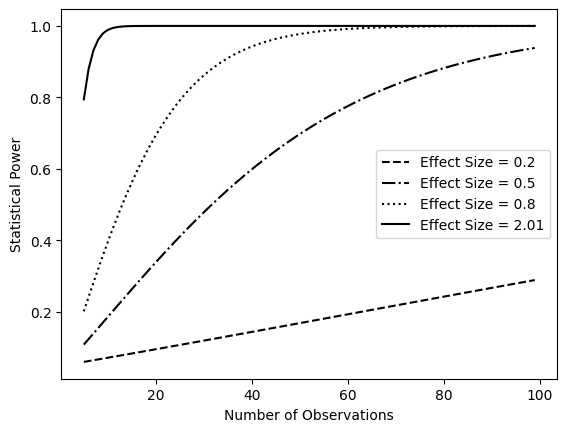

In [10]:
import pandas as pd
import numpy as np
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

def cohen_statistic(clf1, clf2):
    diff = np.mean(DT_all) - np.mean(SVM_all)
    var_dt = np.var(DT_all)
    var_svm = np.var(SVM_all)

    cohens_D = diff / np.sqrt((var_dt + var_svm)/2)
    return  cohens_D

DT_all = np.loadtxt("DT_all.csv")
SVM_all = np.loadtxt("SVM_all.csv")

# extract the two groups that you want to compare
group1 = DT_all
group2 = SVM_all

# compute the effect size of the difference between the two groups using Cohen’s
effect_size = cohen_statistic(group1, group2)
print(effect_size)

# define an array of effect sizes to analyze
effect_sizes = array([0.2, 0.5, 0.8, 2.01])

# define an array of sample sizes to analyze
sample_sizes = array(range(5, 100))

# Set background color to white
fig = pyplot.figure()
fig.patch.set_facecolor('white')
pyplot.ylabel('Statistical Power')
pyplot.xlabel('Number of Observations')

# Define different dashed styles
line_styles = ['--', '-.', ':', '-']

# Initialize an empty list to store power values
power_values = []

# Calculate power values and store them in the power_values list
for effect_size in effect_sizes:
    analysis = TTestIndPower()
    power = [analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=0.05, ratio=1) for n in sample_sizes]
    power_values.append(power)

# Plot power curves with different dashed styles and make it grayscale
for i, power in enumerate(power_values):
    pyplot.plot(sample_sizes, power, linestyle=line_styles[i], color='black', label=f'Effect Size = {effect_sizes[i]}')

# Convert the plot to grayscale
pyplot.set_cmap('gray')

# Show a legend to identify different effect sizes
pyplot.legend()

pyplot.show()